В июле компания запустила целевую акцию для улучшения показателя удержания (retention) новых пользователей. В рамках акции новым пользователям отправлялось приветственное письмо с промо-купоном.

Провести оценку эффективности проведенной акции.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
! gdown --id 18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 24.8MB/s]


In [ ]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [ ]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
df.isna().sum()

,0
user_id,0
order_id,0
reg_date,0
transaction_date,0
revenue,0


In [ ]:
df.dtypes

,0
user_id,int64
order_id,float64
reg_date,object
transaction_date,object
revenue,int64


In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'], format = '%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format = '%Y-%m-%d')

In [ ]:
df['reg_month'] = df['reg_date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
df.groupby('reg_month')['user_id'].agg(['count', 'nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


In [ ]:
df['transaction_month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
df.groupby('transaction_month')['user_id'].agg(['count', 'nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


*Замечены транзакции только за 2015 год*

**Создадим таблицу с первым месяцем регистрации каждого пользователя**

In [ ]:
users = df.groupby('user_id')['reg_month'].min().to_frame().reset_index()

In [ ]:
users

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [ ]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [ ]:
month = pd.DataFrame(pd.date_range(min_date, max_date, freq = 'MS'))

In [ ]:
month.columns = ['month']

In [ ]:
users['key'] = 1
month['key'] = 1

In [ ]:
temp = users.merge(month, on = 'key')[['user_id', 'reg_month', 'month']]

In [ ]:
temp[temp['month'] >= temp['reg_month']] #Убраны строки, в которых даты транзакций раньше даты регистрации

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


*Создана таблица пользователей с их месяцами регистрации и возможными транзациями*

In [ ]:
monthTrans = df.groupby(['user_id', 'transaction_month'])['revenue'].sum().reset_index() # транзакции помесячно

In [ ]:
monthTrans

,user_id,transaction_month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


In [ ]:
monthTrans.columns = ['user_id', 'month', 'revenue'] #для merge

In [ ]:
report = temp.merge(monthTrans, on = ['user_id', 'month'], how = 'left')

In [ ]:
report

,user_id,reg_month,month,revenue
0,-37599,2015-01-01,2015-01-01,NaN
1,-37599,2015-01-01,2015-02-01,NaN
2,-37599,2015-01-01,2015-03-01,1182.0
3,-37599,2015-01-01,2015-04-01,NaN
4,-37599,2015-01-01,2015-05-01,NaN
...,...,...,...,...
530349,138987,2014-10-01,2015-07-01,NaN
530350,138987,2014-10-01,2015-08-01,NaN
530351,138987,2014-10-01,2015-09-01,NaN
530352,138987,2014-10-01,2015-10-01,NaN


In [ ]:
report['active'] = (report['revenue'] > 0) * 1

In [ ]:
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0
...,...,...,...,...,...
530349,138987,2014-10-01,2015-07-01,NaN,0
530350,138987,2014-10-01,2015-08-01,NaN,0
530351,138987,2014-10-01,2015-09-01,NaN,0
530352,138987,2014-10-01,2015-10-01,NaN,0


**Теперь сформируем сводную таблицу, в которой будут видны доли активных новых пользователей**

In [ ]:
report['lifetime'] = abs(months_diff(report['month'], report['reg_month']))

In [ ]:
report

,user_id,reg_month,month,revenue,active,lifetime
0,-37599,2015-01-01,2015-01-01,NaN,0,0
1,-37599,2015-01-01,2015-02-01,NaN,0,1
2,-37599,2015-01-01,2015-03-01,1182.0,1,2
3,-37599,2015-01-01,2015-04-01,NaN,0,3
4,-37599,2015-01-01,2015-05-01,NaN,0,4
...,...,...,...,...,...,...
530349,138987,2014-10-01,2015-07-01,NaN,0,9
530350,138987,2014-10-01,2015-08-01,NaN,0,10
530351,138987,2014-10-01,2015-09-01,NaN,0,11
530352,138987,2014-10-01,2015-10-01,NaN,0,12


In [ ]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index = 'reg_month', columns = 'lifetime', values = 'active', aggfunc = 'mean')

In [ ]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.070772,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.069201,0.064825,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.079044,0.072304,0.068015,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.092126,0.077165,0.068110,0.076378,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.108142,0.090118,0.084214,0.094779,0.070851,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.165684,0.089544,0.090885,0.062198,0.000000,0.000000,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.134307,0.111314,0.078832,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2015-09-01,0.429314,0.190748,0.110707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


<Axes: xlabel='lifetime', ylabel='reg_month'>

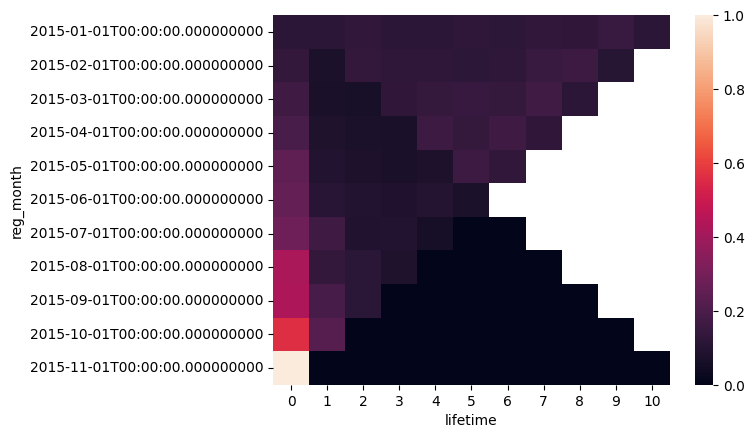

In [ ]:
sns.heatmap(retention)

*После визуализации на heatmap видно, что наблюдается статистически значимое увеличение доли активных пользователей в когорте июля по сравнению с предыдущими и последующими месяцами*